<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_RotatingReferenceFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector in Rotating Reference</h1></b>

Dr. Bingsen Wang

7/20/2024
</center>

#Three-Phase Variables

In three-phase power systems, the voltages are typically sinusoidal. The three phase voltages $v_a,v_b,v_c$ form a postive sequence if they have the same amplitude and frequency and different phase angles with $v_a$ leading $v_b$ by 120 degrees and $v_b$ leading $v_c$ by 120 degrees.
$$\begin{align}
v_a &= V\cos\left(\omega_e t+\theta \right)\\
v_b &= V\cos\left(\omega_e t+\theta - \frac{2\pi}{3} \right)\\
v_c &= V\cos\left(\omega_e t+\theta + \frac{2\pi}{3} \right)
\end{align}\tag{1}$$

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{2}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

##Space Vector in Stationary Reference Frame

With reference to (1) and (2), the voltage space vector in stationary reference frame is
$$\begin{align}
\underline v_{\alpha\beta} &= {2\over3}\left(v_a + v_be^{j\frac{2\pi}{3}} + v_ce^{j\frac{4\pi}{3}}\right)\\
&= {2V\over3}\left[\cos\left(\omega_e t+\theta\right) + \cos\left(\omega_e t+\theta - \frac{2\pi}{3} \right)e^{j\frac{2\pi}{3}} + \cos\left(\omega_e t+\theta + \frac{2\pi}{3} \right)e^{j\frac{4\pi}{3}}\right]
\end{align}\tag{3}$$

Based on Euler's identity $e^{jx}=\cos x + j\sin x$, the cosine function can be written in terms exponential functions.
$$\cos x = \frac{e^{jx} + e^{-jx}}{2}\tag{4}$$

Hence, (3) can be rewritten as
$$\begin{align}\underline v_{\alpha\beta} &= {2V\over3\times2}\begin{bmatrix}
e^{j\left(\omega_e t+\theta\right)} + e^{j\left(\omega_e t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{j\left(\omega_e t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}+\\
e^{-j\left(\omega_e t+\theta\right)} + e^{-j\left(\omega_e t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{-j\left(\omega_e t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}
\end{bmatrix}\\
&= Ve^{j(\omega_e t+\theta)}
\end{align}\tag{5}$$

#Rotating Reference Frame

If the reference frame rotates at angular frequency $\omega$, then the space vector in the reference frame is

$$\underline v_{qd} = \underline v_{\alpha\beta}e^{-j\omega t}\tag{6}$$

Substituting (5) in (6) yields
$$\underline v_{qd} = V e^{j[(\omega_e-\omega) t+\theta]}\tag{7}$$

#Python Code
The Python code illustrates the space vector in a rotating reference frame.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
0


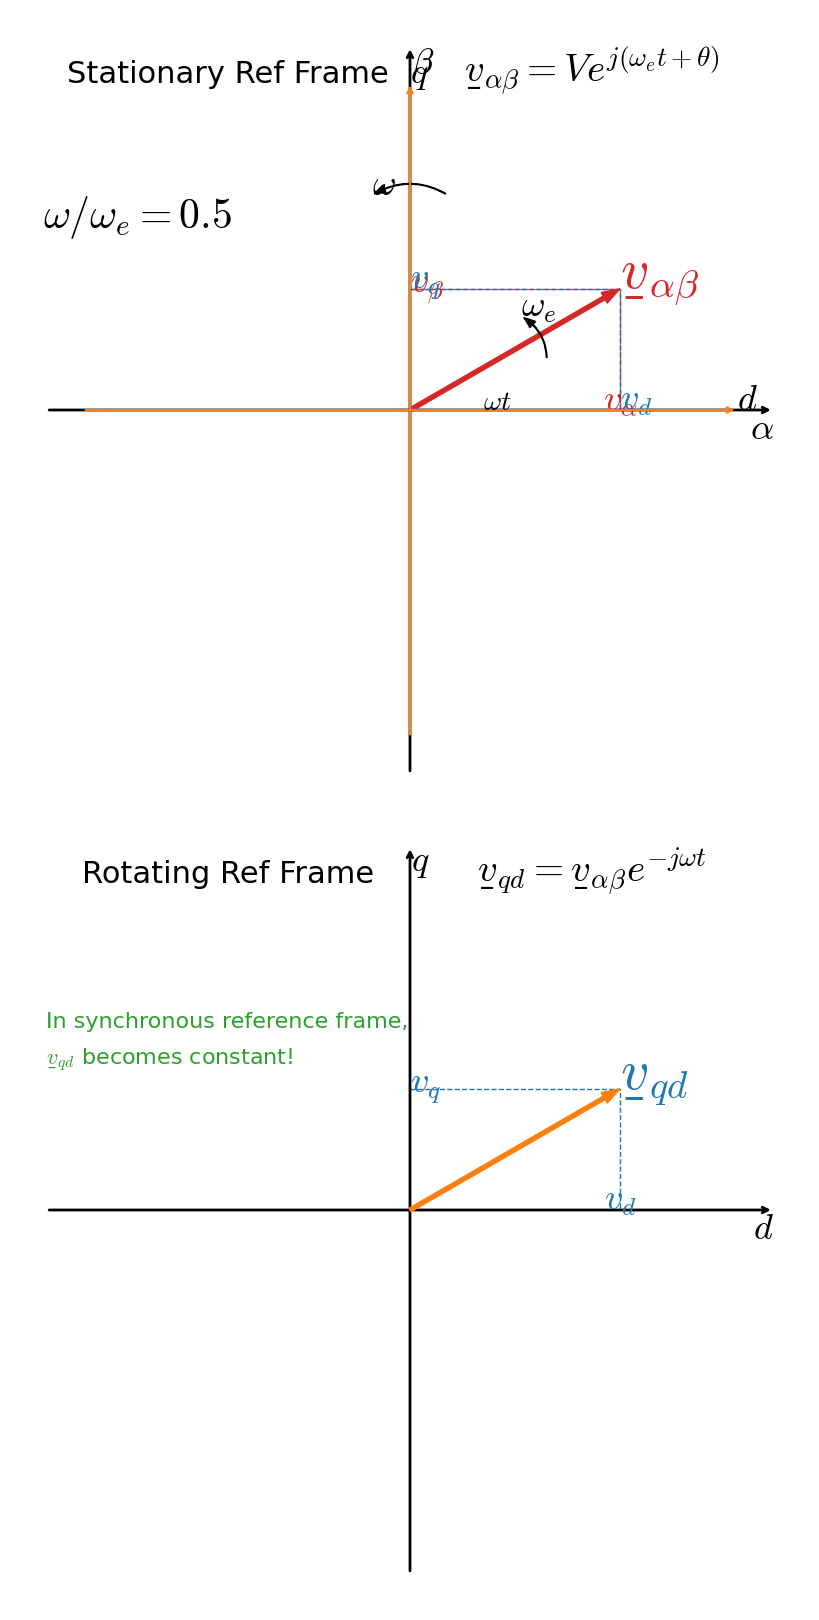

In [141]:
from operator import eq
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def v_alphabeta(V,w,t,theta):
  return V*exp(1j*(w*t+theta))
def v_qd(V,we,w,t,theta):
  return V*exp(1j*((we-w)*t+theta))
#parameters
Nfps = 300
fe= 1 #frequency in Hz
we=2*pi*fe #rotating frequency
t=linspace(0,2/fe,Nfps)
V = 3 #voltage in V
theta = pi/6 #phase angle of space vector
w_lst=[0.5*2*pi,0.8*2*pi,1*2*pi] #reference rotational speed
v_alphabeta_ser=v_alphabeta(V,we,t,theta)
xymax = 4.5

xylim=[-xymax*1.1,xymax*1.1]
clst=['tab:red','tab:blue','tab:brown','tab:green','tab:olive','tab:orange','k','w'] #colors light bg
title_lst = ['Stationary Ref Frame','Rotating Ref Frame']
x_axis_names = [r'$\alpha$','$d$']
y_axis_names = [r'$\beta$','$q$']
eq_lst=[r'$v\underbar_{\alpha\beta} = Ve^{j(\omega_et+\theta)}$',r'$v\underbar_{qd} = v\underbar_{\alpha\beta} e^{-j\omega t}$']
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_lst = []
for k in range(2):
  ax_lst.append(fig.add_axes((0.5/9,.5,8/9,.5),xlim=xylim,ylim=xylim,fc='none'))
  ax_lst[-1].axis('off')
  ax_lst.append(fig.add_axes((0.5/9,0,8/9,.5),xlim=xylim,ylim=xylim,fc='none'))
  ax_lst[-1].axis('off')
for k in range(2):
  ax_lst[k].annotate("",(xymax,0),(-xymax,0),arrowprops={'arrowstyle':"->",'lw':2})
  ax_lst[k].annotate("",(0,xymax),(0,-xymax),arrowprops={'arrowstyle':"->",'lw':2})
  ax_lst[k].text(xymax,-.03,x_axis_names[k],size=26,va='top',ha='right') #x-axis label
  ax_lst[k].text(0.01,xymax,y_axis_names[k],size=26,va='top') #y label
  ax_lst[k].text(-xymax*.5,xymax*.9,title_lst[k],size=22,ha='center')
  ax_lst[k].text(xymax*.5,xymax*.9,eq_lst[k],size=28,ha='center')
text_omega = ax_lst[0].text(-xymax*.75,xymax*.5,r'', size=30,color='k',ha='center')
lines = []
for k in range(2):
  lines.append(ax_lst[0].plot([],[],'--',lw=1,color=clst[k])[0])
  lines.append(ax_lst[1].plot([],[],'--',lw=1,color=clst[k])[0])

def drawVectors_srf(ax,xymax,v_sv,v_qd,wt,clst): # in stationary reference frame
  theta = angle(v_sv) if angle(v_sv)>0 else angle(v_sv)+2*pi
  ax.clear()
  ax.set_xlim(xylim)
  ax.set_ylim(xylim)
  ax.axis('off')
  arr = mp.FancyArrow(0,0,v_sv.real, v_sv.imag, width=.05,length_includes_head=True,
                   color=clst[0])
  ax.add_patch(arr) #space vector
  hapos = 'left' if theta<pi/2 or theta>3*pi/2 else 'right'
  ax.text(v_sv.real,v_sv.imag,r'$v\underbar_{\alpha\beta}$', size = 40,color=clst[0],ha=hapos)
  ax.text(v_sv.real,0,r'$v_\alpha$', size = 26,color=clst[0],ha='center') #v_alpha
  ax.text(0,v_sv.imag,r'$v_\beta$', size = 26,color=clst[0],va='center') #v_beta
  ax.text(v_qd.real*cos(wt),v_qd.real*sin(wt), r'$v_d$', size = 26,color=clst[1]) #vd
  ax.text(-v_qd.imag*sin(wt),v_qd.imag*cos(wt), r'$v_q$', size = 26,color=clst[1]) #vq
  arc = mp.FancyArrowPatch((.6*(v_sv*exp(-1j*pi/18)).real,.6*(v_sv*exp(-1j*pi/18)).imag),
   (.6*(v_sv*exp(1j*pi/18)).real,.6*(v_sv*exp(1j*pi/18)).imag),connectionstyle="arc3,rad=.3",
    arrowstyle="Simple, tail_width=0.5, head_width=6, head_length=8",color='k')
  ax.add_patch(arc) # arc for omega_e
  ax.text(.6*(v_sv*exp(1j*pi/18)).real,.6*(v_sv*exp(1j*pi/18)).imag,
          r'$\omega_e$', size = 26,color=clst[-2]) #omega_e marking

  ax.annotate("",(.9*xymax*cos(wt),.9*xymax*sin(wt)),(-.9*xymax*cos(wt),-.9*xymax*sin(wt)),
              arrowprops={'arrowstyle':"->","lw":1.5,'color':clst[-3]}) #d-axis
  arc = mp.Arc((0,0),xymax*.4,xymax*.4,theta1=0,theta2=wt/pi*180)
  ax.add_patch(arc) # arc for d-axis
  ax.text(xymax*.2*cos(0.5*wt),xymax*.2*sin(.5*wt), r'$\omega t$', size = 20,color='k') #angle of d-axis
  ax.annotate("",(-.9*xymax*sin(wt),.9*xymax*cos(wt)),(.9*xymax*sin(wt),-.9*xymax*cos(wt)),
              arrowprops={'arrowstyle':"->","lw":1.5,'color':clst[-3]}) #q-axis
  ax.text(.9*xymax*cos(wt),.9*xymax*sin(wt), x_axis_names[1], size = 26,color=clst[-2]) #d-axis name
  ax.text(-.9*xymax*sin(wt),.9*xymax*cos(wt), y_axis_names[1], size = 26,color=clst[-2]) #q-axis name
  arc = mp.FancyArrowPatch((.6*xymax*exp(1j*(wt+pi/2-pi/18)).real,.6*xymax*exp(1j*(wt+pi/2-pi/18)).imag),
   (.6*xymax*exp(1j*(wt+pi/2+pi/18)).real,.6*xymax*exp(1j*(wt+pi/2+pi/18)).imag),connectionstyle="arc3,rad=.3",
    arrowstyle="Simple, tail_width=0.5, head_width=6, head_length=8",color='k')
  ax.add_patch(arc) # arc for omega
  ax.text(.6*xymax*exp(1j*(wt+pi/2+pi/18)).real,.6*xymax*exp(1j*(wt+pi/2+pi/18)).imag,
          r'$\omega$', size = 26,color=clst[-2]) #omega marking
  return

def drawVectors_rrf(ax,xymax,v_qd,clst): # in rotating reference frame
  ax.clear()
  ax.set_xlim(xylim)
  ax.set_ylim(xylim)
  ax.axis('off')
  theta = angle(v_qd) if angle(v_qd)>0 else angle(v_qd)+2*pi
  arr = mp.FancyArrow(0,0,v_qd.real, v_qd.imag, width=.05,length_includes_head=True,
                   color=clst[-3])
  ax.add_patch(arr) #space vector
  hapos = 'left' if theta<pi/2 or theta>3*pi/2 else 'right'
  ax.text(v_qd.real,v_qd.imag,r'$v\underbar_{qd}$', size = 40,color=clst[1],ha=hapos)
  ax.text(v_qd.real,0,r'$v_d$', size = 26,color=clst[1],ha='center') #v_d
  ax.text(0,v_qd.imag,r'$v_q$', size = 26,color=clst[1],va='center') #v_q
  return

# animation function. This is called sequentially
def animate(i):
  # i=Nfps*2
  v_qd_ser=v_qd(V,we,w_lst[int(i/Nfps)],t,theta)
  wt = w_lst[int(i/Nfps)]*t
  if i%30==0: print(i) #for monitoring the progress
  if i%Nfps==0:
    text_omega.set_text(r'$\omega/\omega_e={:.1f}$'.format(w_lst[int(i/Nfps)]/we))
  if i%Nfps==0 and int(i/Nfps)==len(w_lst)-1:
    ax_lst[1].text(-xymax,.5*xymax,'In synchronous reference frame,',size=16,color=clst[3])
    ax_lst[1].text(-xymax,.4*xymax,r'$v\underbar_{qd}$ becomes constant!',size=16,color=clst[3])
  i=i%Nfps
  lines[0].set_data([0,v_alphabeta_ser[i].real,v_alphabeta_ser[i].real],
   [v_alphabeta_ser[i].imag,v_alphabeta_ser[i].imag,0]) # dotted line for v_alpha and v_beta
  lines[2].set_data([v_qd_ser[i].real*cos(wt[i]),v_alphabeta_ser[i].real,-v_qd_ser[i].imag*sin(wt[i])],
   [v_qd_ser[i].real*sin(wt[i]),v_alphabeta_ser[i].imag,v_qd_ser[i].imag*cos(wt[i])]) # dotted line for v_qd
  lines[3].set_data([0,v_qd_ser[i].real,v_qd_ser[i].real],
   [v_qd_ser[i].imag,v_qd_ser[i].imag,0]) # dotted line for v_d and v_q
  drawVectors_srf(ax_lst[2],xymax,v_alphabeta_ser[i],v_qd_ser[i],wt[i],clst)
  drawVectors_rrf(ax_lst[3],xymax,v_qd_ser[i],clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*len(w_lst), interval=50)
fn = r"SpaceVector_RotatingReferenceFrame.mp4"
writervideo = animation.FFMpegWriter(fps=25)
anim.save(fn, writer=writervideo,dpi = 200)